In [1]:

from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_62dedba2715447e59167b4ecb0c199d4(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_1fb3bd2d59fde7b5506ca4ebdeaa163b522d024b','domain': {'id': '1f9f1350f2ee4e4ea9478eac6982a383'},
            'password': 'g}Q5[0s3Zs8Xb-6x'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_62dedba2715447e59167b4ecb0c199d4('DataScienceExperienceandMachineLearning', 'PastHires.csv'))
df_data_1.head()
#df_data_1.tail()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [5]:
import brunel

%brunel data('df_data_1') x(Years_Experience) y(Previous_employers) color(Level_of_Education) :: width=800, height=300

<IPython.core.display.Javascript object>

In [2]:

df_data_2 = pd.read_csv(get_object_storage_file_with_credentials_62dedba2715447e59167b4ecb0c199d4('DataScienceExperienceandMachineLearning', 'cars.csv'))
df_data_2.head()


,mpg,cylinders,engine,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,American,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,American,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,American,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,American,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,American,ford torino


In [11]:
import brunel

%brunel data('df_data_2') x(mpg) y(horsepower) color(origin) :: width=800, height=300

<IPython.core.display.Javascript object>

In [13]:
%brunel data('df_data_2') x(horsepower) y(weight) color(origin) tooltip(name) :: width=800, height=300

<IPython.core.display.Javascript object>

In [36]:
%brunel data('df_data_2') treemap x(origin, year, cylinders) color(mpg) mean(mpg) size(#count) label(cylinders) tooltip(#all):: width=900, height=600

<IPython.core.display.Javascript object>

In [40]:
%brunel data('df_data_2') bar x(cylinders) y(#count) :: width=800, height=300

<IPython.core.display.Javascript object>

In [45]:
%brunel data('df_data_2') x(horsepower) y(Weight:linear) filter(origin) color(origin) tooltip(name) :: width=800, height=300

<IPython.core.display.Javascript object>

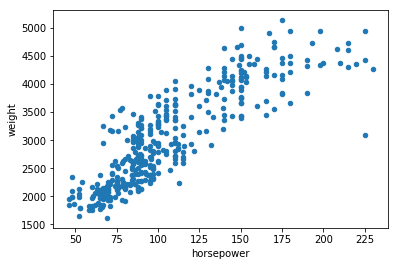

In [4]:
import matplotlib.pyplot as plt
df_data_2.plot.scatter(x='horsepower', y='weight');